In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install ultralytics


0: 544x640 2 Dead Fishs, 8.8ms
Speed: 3.9ms preprocess, 8.8ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)


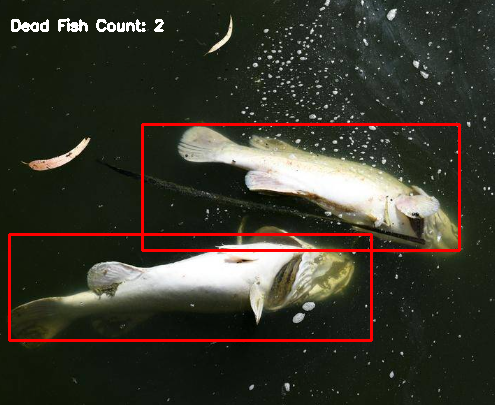

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path
from ultralytics import YOLO
from ultralytics.utils.files import increment_path

dead_fish_count = 0

def run(
    weights='/content/drive/MyDrive/Project-Fish-ML/Project-Fish-ML/best (6).pt',  # Change to your dead fish detection model weights
    source=None,
    device='cpu',
    view_img=False,
    save_img=False,
    exist_ok=False,
    line_thickness=2,
):
    global dead_fish_count

    # Check source path
    if not Path(source).exists():
        raise FileNotFoundError(f"Source path '{source}' does not exist.")

    # Setup Model
    model = YOLO(weights)
    model.to('cuda') if device == 'cuda' else model.to('cpu')

    # Read the input image
    frame = cv2.imread(source)

    # Extract the results for the current frame
    results = model(frame)

    # Reset dead fish count for each frame
    dead_fish_count = 0

    # Iterate over each result in the list
    for result in results:
        # Access the xyxy property and confidence values
        xyxy = result.boxes.xyxy.cpu().numpy()
        conf = result.boxes.conf.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy()

        for (x1, y1, x2, y2), c, class_id in zip(xyxy, conf, class_ids):
            # Assuming dead fish is the first class (class ID 0), replace this with your actual class ID
            if class_id == 0:
                dead_fish_count += 1

                # Draw bounding box
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), line_thickness)

    # Display the dead fish count on the frame at the top-right corner
    count_label = f'Dead Fish Count: {dead_fish_count}'
    cv2.putText(frame, count_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Display the frame with dead fish count
    if view_img:
        cv2_imshow(frame)

    # Save the frame if specified
    if save_img:
        output_path = Path('/content/drive/MyDrive/Prediction_Dead_Fish') / 'exp' / f'{Path(source).stem}_dead_fish_counted.jpg'
        cv2.imwrite(str(output_path), frame)

# Example usage in Colab
weights_path_dead_fish = '/content/drive/MyDrive/Project-Fish-ML/Project-Fish-ML/best (6).pt'
image_path_dead_fish = '/content/drive/MyDrive/Project-Fish-ML/Project-Fish-ML/Dead_Fish_train064.png'

run(weights=weights_path_dead_fish, source=image_path_dead_fish, device='cuda', view_img=True, save_img=True)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path
from ultralytics import YOLO
from ultralytics.utils.files import increment_path

dead_fish_count = 0

def run(
    weights='/content/drive/MyDrive/Project-Fish-ML/Project-Fish-ML/best (6).pt',  # Change to your dead fish detection model weights
    source=None,
    device='cpu',
    view_img=False,
    save_img=False,
    save_video=True,
    exist_ok=False,
    line_thickness=2,
):
    global dead_fish_count

    vid_frame_count = 0

    # Check source path
    if not Path(source).exists():
        raise FileNotFoundError(f"Source path '{source}' does not exist.")

    # Setup Model
    model = YOLO(weights)
    model.to('cuda') if device == 'cuda' else model.to('cpu')

    # Video setup
    videocapture = cv2.VideoCapture(source)
    frame_width, frame_height = int(videocapture.get(3)), int(videocapture.get(4))
    fps, fourcc = int(videocapture.get(5)), cv2.VideoWriter_fourcc(*'mp4v')

    # Output setup
    save_dir = increment_path(Path('/content/drive/MyDrive/Prediction 5') / 'exp', exist_ok)  # Output Save Location
    save_dir.mkdir(parents=True, exist_ok=True)
    video_writer = cv2.VideoWriter(str(save_dir / f'{Path(source).stem}_dead_fish_counted.mp4'), fourcc, fps, (frame_width, frame_height))

    # Iterate over video frames
    while videocapture.isOpened():
        success, frame = videocapture.read()
        if not success:
            break
        vid_frame_count += 1

        # Extract the results for the current frame
        results = model(frame)

        # Reset dead fish count for each frame
        dead_fish_count = 0

        # Iterate over each result in the list
        for result in results:
            # Access the xyxy property and confidence values
            xyxy = result.boxes.xyxy.cpu().numpy()
            conf = result.boxes.conf.cpu().numpy()
            class_ids = result.boxes.cls.cpu().numpy()

            for (x1, y1, x2, y2), c, class_id in zip(xyxy, conf, class_ids):
                # Assuming dead fish is the first class (class ID 0), replace this with your actual class ID
                if class_id == 0:
                    dead_fish_count += 1

                    # Draw bounding box
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), line_thickness)

        # Display the dead fish count on the frame at the top-right corner
        count_label = f'Dead Fish Count: {dead_fish_count}'
        cv2.putText(frame, count_label, (frame_width - 300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Display the frame with dead fish count
        if view_img:
            cv2_imshow(frame)

        # Save the frame if specified
        if save_img:
            cv2.imwrite(f'output_frame_{vid_frame_count}.jpg', frame)

        # Write the frame to the output video
        if save_video:
            video_writer.write(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    del vid_frame_count
    video_writer.release()
    videocapture.release()

# Example usage in Colab
weights_path_dead_fish = '/content/drive/MyDrive/Project-Fish-ML/Project-Fish-ML/best (6).pt'
video_path = '/content/drive/MyDrive/Project-Fish-ML/Project-Fish-ML/WhatsApp Video 2023-12-01 at 09.00.07_22f66179.mp4'

run(weights=weights_path_dead_fish, source=video_path, device='cuda', view_img=True, save_img=False, save_video=True)